In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Leitura e Split dos Dados

### Leitura e separação do X e y

In [3]:
# leitura do arquivo .csv
df_features = pd.read_csv('features_2.csv', sep=';')
df_features.head()

,bandwidth_kurtosis,bandwidth_mean,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,chroma_kurtosis,chroma_mean,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
0,0.792825,3072.275133,-1.201043,507.373242,-0.381658,2891.428242,-0.181103,927.581419,-0.996609,0.425177,...,0.062612,-0.297401,6602.908278,-0.864370,2199.022393,172.265625,1.592372,0.116526,1.002750,0.067756
1,-0.036886,3108.915592,-0.024222,474.607726,-0.275559,3004.068629,0.356506,926.389547,-0.967589,0.432395,...,0.059313,-0.708399,6694.672852,-0.429503,2034.134902,172.265625,1.310963,0.120320,0.941287,0.061194
2,-0.035471,2882.196422,0.507558,516.427608,1.138507,2707.773790,1.216916,1150.399104,-0.820446,0.411499,...,0.048298,-0.871476,5628.779297,0.228863,2278.133044,172.265625,6.739282,0.109788,2.212498,0.071455
3,-0.676834,2769.930595,-0.005707,505.898959,1.717588,2484.916583,1.299290,1124.511334,-0.655082,0.376489,...,0.049686,-0.925599,5121.589543,0.220824,2375.281410,172.265625,9.388941,0.101765,2.606648,0.071890
4,-0.415972,2986.595010,-0.510374,542.023823,-0.832082,2609.975944,0.112207,923.236585,-0.952736,0.410691,...,0.058376,-0.958447,5969.666466,-0.532559,2395.954406,172.265625,-0.388210,0.097341,0.692448,0.055044


In [4]:
# salvamos a coluna com os generos como sendo nosso y
y = df_features[["genre"]]
y.head()

,genre
0,6
1,6
2,6
3,6
4,6


In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
from keras.utils import to_categorical
categorical_labels = to_categorical(y, num_classes=10)

In [76]:
t = np.argmax(y_train, axis = 1)
t[t==0].shape,t[t==1].shape,t[t==2].shape,t[t==3].shape,t[t==4].shape,t[t==5].shape,t[t==6].shape,t[t==7].shape,t[t==8].shape,t[t==9].shape

((1383,),
 (1407,),
 (1431,),
 (1366,),
 (1384,),
 (1396,),
 (1405,),
 (1381,),
 (1396,),
 (1421,))

In [7]:
# com excecao da coluna com os generos as demais serao usadas como X
X = df_features.drop(['genre'], axis=1)
X.head()

,bandwidth_kurtosis,bandwidth_mean,bandwidth_skew,bandwidth_std,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,chroma_kurtosis,chroma_mean,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
0,0.792825,3072.275133,-1.201043,507.373242,-0.381658,2891.428242,-0.181103,927.581419,-0.996609,0.425177,...,0.062612,-0.297401,6602.908278,-0.864370,2199.022393,172.265625,1.592372,0.116526,1.002750,0.067756
1,-0.036886,3108.915592,-0.024222,474.607726,-0.275559,3004.068629,0.356506,926.389547,-0.967589,0.432395,...,0.059313,-0.708399,6694.672852,-0.429503,2034.134902,172.265625,1.310963,0.120320,0.941287,0.061194
2,-0.035471,2882.196422,0.507558,516.427608,1.138507,2707.773790,1.216916,1150.399104,-0.820446,0.411499,...,0.048298,-0.871476,5628.779297,0.228863,2278.133044,172.265625,6.739282,0.109788,2.212498,0.071455
3,-0.676834,2769.930595,-0.005707,505.898959,1.717588,2484.916583,1.299290,1124.511334,-0.655082,0.376489,...,0.049686,-0.925599,5121.589543,0.220824,2375.281410,172.265625,9.388941,0.101765,2.606648,0.071890
4,-0.415972,2986.595010,-0.510374,542.023823,-0.832082,2609.975944,0.112207,923.236585,-0.952736,0.410691,...,0.058376,-0.958447,5969.666466,-0.532559,2395.954406,172.265625,-0.388210,0.097341,0.692448,0.055044


### Divisão do dataset

In [8]:
# iremos dividir o dataset entre treino, validacao e teste. As proporcoes serão de 70%. 15% e 15%
X_train, X_test, y_train, y_test = train_test_split(X.values, categorical_labels, test_size=0.3, shuffle=True)
X_validacao, X_test, y_validacao, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [70]:
y_train[y_train==0].shape,y_train[y_train==1].shape,y_train[y_train==2].shape,y_train[y_train==3].shape,y[y==4].shape,y[y==5].shape,y[y==6].shape,y[y==7].shape,y[y==8].shape,y[y==9].shape,

((125730,),
 (13970,),
 (0,),
 (1992,),
 (1992,),
 (1992,),
 (2000,),
 (2000,),
 (2000,),
 (1996,))

In [9]:
X_train.shape, y_train.shape

((13970, 81), (13970, 10))

In [10]:
X_validacao.shape, y_validacao.shape

((2994, 81), (2994, 10))

In [11]:
X_test.shape, y_test.shape

((2994, 81), (2994, 10))

### Normalização dos valores de X

In [12]:
# para ter resultados mais independentes cada um dos datasets sera normalizado individualmente
scaler = StandardScaler()

In [13]:
# normalizacao do dataset de treino
X_train = scaler.fit_transform(X_train)

In [14]:
# normalizacao do dataset de validacao
X_validacao = scaler.fit_transform(X_validacao)

In [15]:
# normalizacao do dataset de teste
X_test = scaler.fit_transform(X_test)

## Definicao do Modelo da Rede Neural

### Tentativa #1

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               41984     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 215,114
Trainable params: 215,114
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, y_train,
          batch_size=512,
          epochs=20,
          verbose=1,
          validation_data=(X_validacao, y_validacao))

Instructions for updating:
Use tf.cast instead.
Train on 13970 samples, validate on 2994 samples
Epoch 1/20
13970/13970 [==============================] - 1s 49us/step - loss: 1.4555 - acc: 0.4946 - val_loss: 0.9638 - val_acc: 0.6653
Epoch 2/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.8230 - acc: 0.7110 - val_loss: 0.7309 - val_acc: 0.7492
Epoch 3/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.6243 - acc: 0.7899 - val_loss: 0.6629 - val_acc: 0.7635
Epoch 4/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.5206 - acc: 0.8291 - val_loss: 0.5538 - val_acc: 0.8123
Epoch 5/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.4173 - acc: 0.8642 - val_loss: 0.5064 - val_acc: 0.8370
Epoch 6/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.3399 - acc: 0.8923 - val_loss: 0.4759 - val_acc: 0.8370
Epoch 7/20
13970/13970 [==============================] - 0s 25us/step - loss: 0.

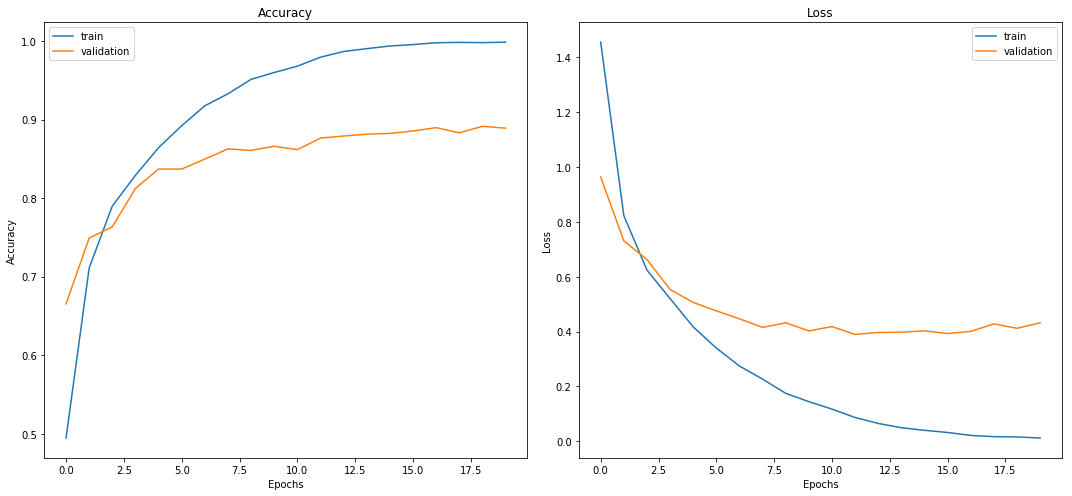

In [18]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
preds = np.argmax(model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

Normalized confusion matrix


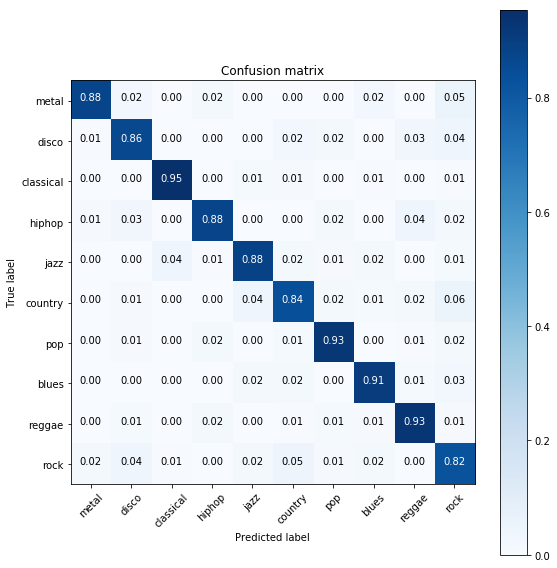

In [23]:
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}


keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

### Tentativa #2

In [16]:
X_train2 = np.expand_dims(X_train, axis=2)
X_validacao2 = np.expand_dims(X_validacao, axis=2)

In [51]:
input_shape = (X_train2.shape[1],X_train2.shape[2])

model_2 = Sequential()

model_2.add(Conv1D(16, kernel_size=2, strides=1,activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=1,strides=2))
model_2.add(Dropout(0.25))

model_2.add(Conv1D(32, kernel_size=2, strides=1, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=2,strides=2))
model_2.add(Dropout(0.25))

model_2.add(Conv1D(64, kernel_size=2,strides=1, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=2,strides=2))
model_2.add(Dropout(0.25))

model_2.add(Conv1D(128, kernel_size=2,strides=1, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=2,strides=2))
model_2.add(Dropout(0.25))

model_2.add(Conv1D(64, kernel_size=2,strides=1, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=3,strides=3))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_61 (Conv1D)           (None, 80, 16)            48        
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 40, 16)            0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 40, 16)            0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 39, 32)            1056      
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 19, 32)            0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 19, 32)            0         
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 18, 64)            4160      
__________

In [52]:
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [53]:
hist_2 = model_2.fit(X_train2, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_validacao2, y_validacao))

Train on 13970 samples, validate on 2994 samples
Epoch 1/100
13970/13970 [==============================] - 4s 312us/step - loss: 2.0325 - acc: 0.2304 - val_loss: 1.8109 - val_acc: 0.3764
Epoch 2/100
13970/13970 [==============================] - 3s 197us/step - loss: 1.7322 - acc: 0.3656 - val_loss: 1.5655 - val_acc: 0.4452
Epoch 3/100
13970/13970 [==============================] - 3s 191us/step - loss: 1.5573 - acc: 0.4393 - val_loss: 1.4010 - val_acc: 0.5147
Epoch 4/100
13970/13970 [==============================] - 4s 262us/step - loss: 1.4564 - acc: 0.4795 - val_loss: 1.2805 - val_acc: 0.5578
Epoch 5/100
13970/13970 [==============================] - 3s 236us/step - loss: 1.3872 - acc: 0.5057 - val_loss: 1.2257 - val_acc: 0.5802
Epoch 6/100
13970/13970 [==============================] - 3s 192us/step - loss: 1.3295 - acc: 0.5267 - val_loss: 1.1493 - val_acc: 0.6005
Epoch 7/100
13970/13970 [==============================] - 3s 202us/step - loss: 1.2852 - acc: 0.5422 - val_loss: 1.0

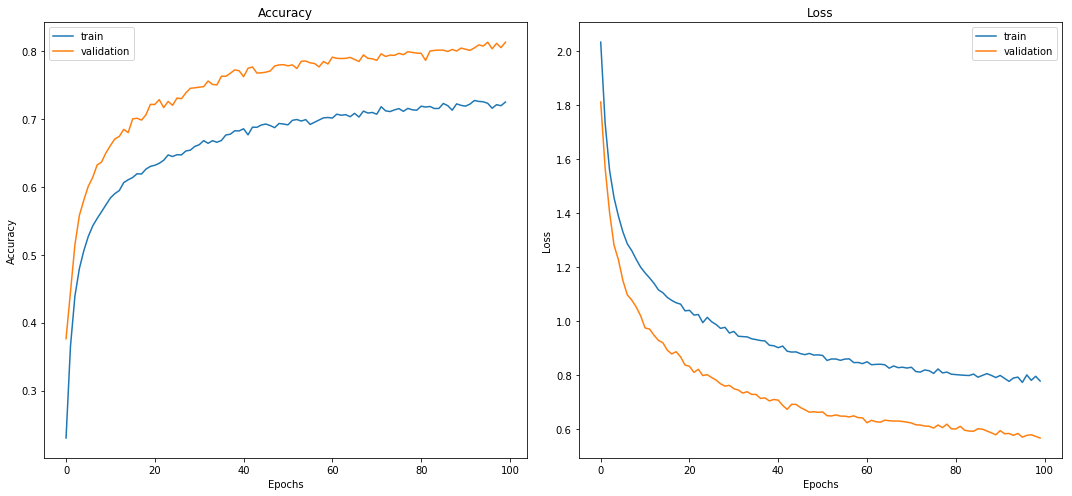

In [54]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist_2.history['acc'], label='train')
plt.plot(hist_2.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['loss'], label='train')
plt.plot(hist_2.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
X_test2 = np.expand_dims(X_test, axis=2)

In [60]:
preds = np.argmax(model_2.predict(X_test2), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)

In [64]:
score = model_2.evaluate(X_test2, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 0.535 and val_acc = 0.829


Normalized confusion matrix


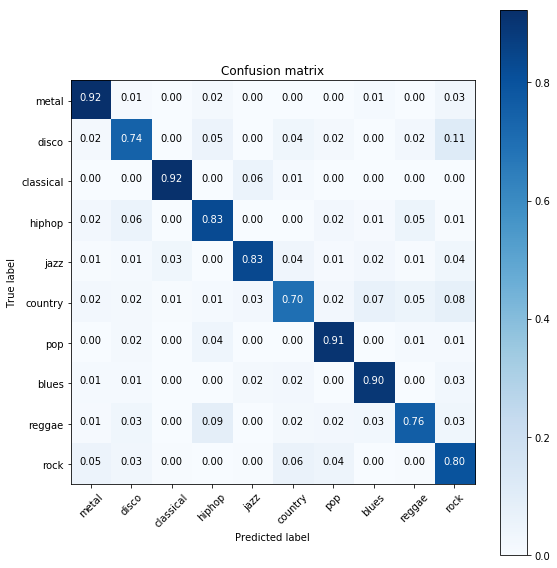

In [63]:
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}


keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)